# Vulnerability Assessment Using Unsupervised Learning

## Introduction
In this project, we aim to perform a comprehensive vulnerability assessment using unsupervised learning techniques. By leveraging clustering and anomaly detection, we hope to identify and analyze vulnerabilities in a dataset, ultimately improving our understanding and ability to mitigate potential security risks.


## Data Preprocessing

Before diving into the analysis, it's essential to preprocess the data to ensure it's clean and suitable for machine learning. This step includes loading the data, converting date columns, and creating additional features.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the CSV file
file_path = '/kaggle/input/vulnerability-assessment-data1-csv/vulnerability_assessment_data.csv'
df = pd.read_csv(file_path)

# Ensure date columns are in datetime format
df['Discovered Date'] = pd.to_datetime(df['Discovered Date'])
df['Patch Date'] = pd.to_datetime(df['Patch Date'])

# Check for missing dates
print(df[['Discovered Date', 'Patch Date']].isna().sum())


Discovered Date    0
Patch Date         0
dtype: int64


# Inspect Data
Next, we inspect the loaded data to understand its structure and check for any missing values.



In [2]:
# Display column names and check for missing values in date columns
print(df.columns)
print(df[['Discovered Date', 'Patch Date']].isna().sum())


Index(['ID', 'Description', 'Severity', 'Vulnerability Type',
       'Affected Software', 'Discovered Date', 'Patch Date', 'Risk Score',
       'Description Length', 'Days to Patch'],
      dtype='object')
Discovered Date    0
Patch Date         0
dtype: int64


# Create Additional Features
We create additional features based on the existing data to enhance our analysis.

In [3]:
# Create additional features
df['Description Length'] = df['Description'].apply(len)
df['Days to Patch'] = (df['Patch Date'] - df['Discovered Date']).dt.days

# Display the first few rows of the DataFrame to ensure the new features are created correctly
print(df.head())


   ID                  Description Severity Vulnerability Type  \
0   1  Vulnerability description 1   Medium                XSS   
1   2  Vulnerability description 2      Low               CSRF   
2   3  Vulnerability description 3   Medium    Buffer Overflow   
3   4  Vulnerability description 4     High               CSRF   
4   5  Vulnerability description 5      Low               CSRF   

  Affected Software            Discovered Date                 Patch Date  \
0        Software A 2023-05-31 04:25:56.390365 2024-05-03 04:25:56.390927   
1        Software C 2024-04-10 04:25:56.390385 2023-06-09 04:25:56.390936   
2        Software B 2023-09-19 04:25:56.390393 2023-06-22 04:25:56.390941   
3        Software B 2024-03-08 04:25:56.390399 2023-12-20 04:25:56.390946   
4        Software C 2024-04-09 04:25:56.390404 2023-10-17 04:25:56.390951   

   Risk Score  Description Length  Days to Patch  
0           5                  27            338  
1           2                  27     

# Handle Infinite Values
We handle any infinite values by replacing them with NaN and then drop any rows with missing values.

In [4]:
# Replace infinite values with NaN and drop rows with NaN values
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.dropna(inplace=True)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())


   ID                  Description Severity Vulnerability Type  \
0   1  Vulnerability description 1   Medium                XSS   
1   2  Vulnerability description 2      Low               CSRF   
2   3  Vulnerability description 3   Medium    Buffer Overflow   
3   4  Vulnerability description 4     High               CSRF   
4   5  Vulnerability description 5      Low               CSRF   

  Affected Software            Discovered Date                 Patch Date  \
0        Software A 2023-05-31 04:25:56.390365 2024-05-03 04:25:56.390927   
1        Software C 2024-04-10 04:25:56.390385 2023-06-09 04:25:56.390936   
2        Software B 2023-09-19 04:25:56.390393 2023-06-22 04:25:56.390941   
3        Software B 2024-03-08 04:25:56.390399 2023-12-20 04:25:56.390946   
4        Software C 2024-04-09 04:25:56.390404 2023-10-17 04:25:56.390951   

   Risk Score  Description Length  Days to Patch  
0           5                  27            338  
1           2                  27     

# Plot the Distribution of Risk Scores
We visualize the distribution of risk scores using a histogram plot.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


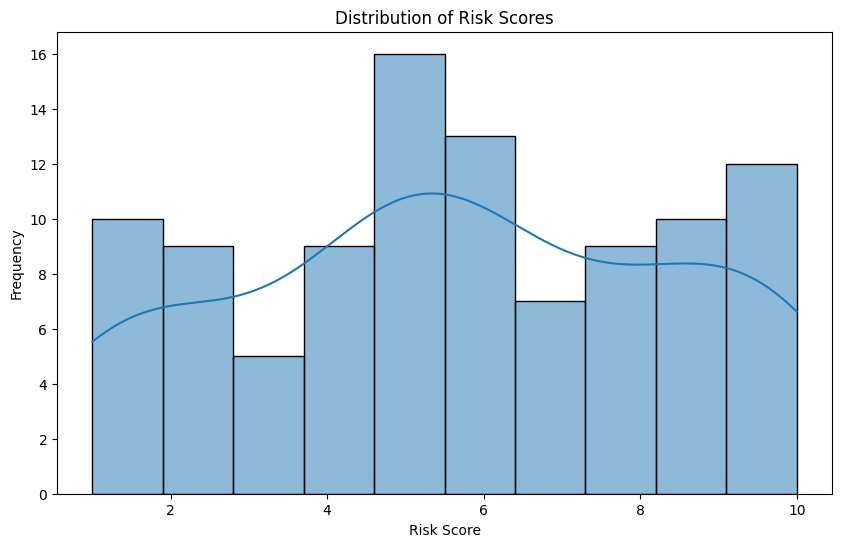

In [5]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of risk scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Risk Score'], bins=10, kde=True)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.savefig('/kaggle/working/risk_scores_distribution.png')  # Save the plot
plt.show()


# Analyze the Relationship Between Days to Patch and Severity
We visualize the relationship between 'Days to Patch' and 'Severity' using a box plot.

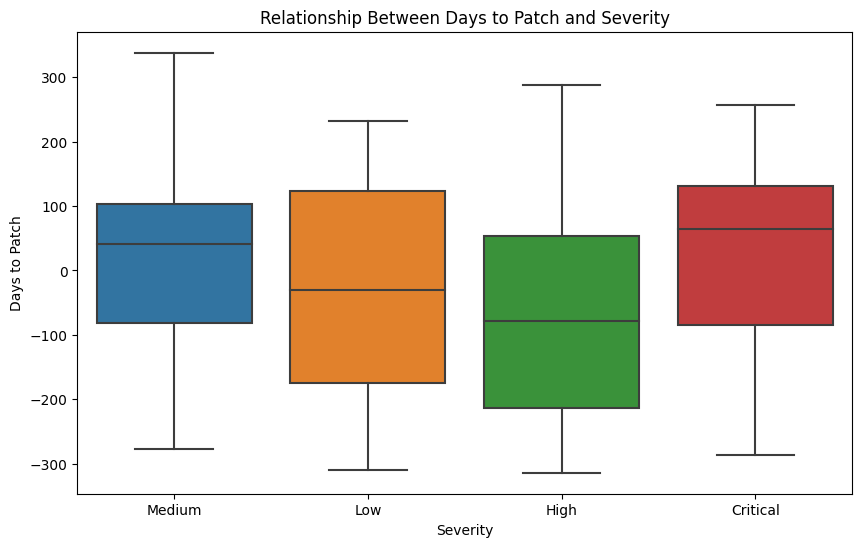

In [6]:
# Relationship between Days to Patch and Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Days to Patch', data=df)
plt.title('Relationship Between Days to Patch and Severity')
plt.xlabel('Severity')
plt.ylabel('Days to Patch')
plt.savefig('/kaggle/working/days_to_patch_severity.png')  # Save the plot
plt.show()


# Perform Clustering with K-Means
# Clustering with K-Means
We perform clustering on the data using the K-Means algorithm to identify patterns and group similar vulnerabilities.

In [7]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = df[['Risk Score', 'Days to Patch', 'Description Length']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows of the DataFrame to ensure clustering is done correctly
print(df.head())
 

 

   ID                  Description Severity Vulnerability Type  \
0   1  Vulnerability description 1   Medium                XSS   
1   2  Vulnerability description 2      Low               CSRF   
2   3  Vulnerability description 3   Medium    Buffer Overflow   
3   4  Vulnerability description 4     High               CSRF   
4   5  Vulnerability description 5      Low               CSRF   

  Affected Software            Discovered Date                 Patch Date  \
0        Software A 2023-05-31 04:25:56.390365 2024-05-03 04:25:56.390927   
1        Software C 2024-04-10 04:25:56.390385 2023-06-09 04:25:56.390936   
2        Software B 2023-09-19 04:25:56.390393 2023-06-22 04:25:56.390941   
3        Software B 2024-03-08 04:25:56.390399 2023-12-20 04:25:56.390946   
4        Software C 2024-04-09 04:25:56.390404 2023-10-17 04:25:56.390951   

   Risk Score  Description Length  Days to Patch  Cluster  
0           5                  27            338        2  
1           2       

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualize Clusters
We visualize the clusters formed by the K-Means algorithm to understand the grouping of vulnerabilities.

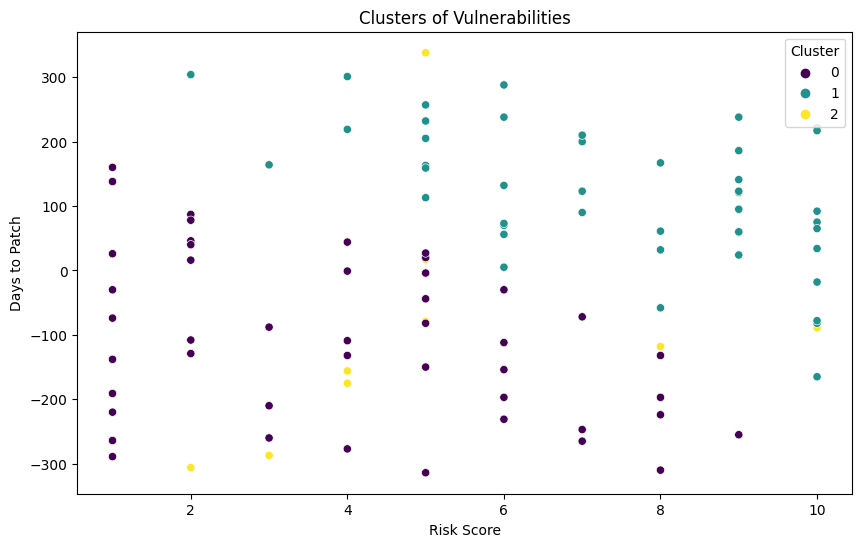

In [8]:
 # Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Risk Score', y='Days to Patch', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Vulnerabilities')
plt.xlabel('Risk Score')
plt.ylabel('Days to Patch')
plt.savefig('/kaggle/working/vulnerability_clusters.png')  # Save the plot
plt.show()


# Final Thoughts
In this project, we used unsupervised learning techniques to analyze and identify patterns in vulnerability data. We performed clustering using the K-Means algorithm and visualized the results to understand the grouping of vulnerabilities based on various features. This approach helps in identifying common characteristics and potential risk factors associated with different types of vulnerabilities.

This notebook demonstrates how to apply unsupervised learning for vulnerability assessment, providing insights into the data without requiring labeled information.